# Задачи к Лекции 5

Дан файл "Anuran_Calls_(MFCCs).zip", в котором содержится обработка звуков издаваемых различными видами лягушек. В качестве признаков выступают мел-кепстральные коэффициенты __[MFCC](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum)__

**Чтение данных**

In [26]:
%matplotlib inline
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 12, 9

z = zipfile.ZipFile("../data/Anuran_Calls_(MFCCs).zip")
df = pd.read_csv(z.open("Frogs_MFCCs.csv"))

df.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


**Получение различной информации**

In [14]:
df.shape

(7195, 26)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 1  7195 non-null   float64
 1   MFCCs_ 2  7195 non-null   float64
 2   MFCCs_ 3  7195 non-null   float64
 3   MFCCs_ 4  7195 non-null   float64
 4   MFCCs_ 5  7195 non-null   float64
 5   MFCCs_ 6  7195 non-null   float64
 6   MFCCs_ 7  7195 non-null   float64
 7   MFCCs_ 8  7195 non-null   float64
 8   MFCCs_ 9  7195 non-null   float64
 9   MFCCs_10  7195 non-null   float64
 10  MFCCs_11  7195 non-null   float64
 11  MFCCs_12  7195 non-null   float64
 12  MFCCs_13  7195 non-null   float64
 13  MFCCs_14  7195 non-null   float64
 14  MFCCs_15  7195 non-null   float64
 15  MFCCs_16  7195 non-null   float64
 16  MFCCs_17  7195 non-null   float64
 17  MFCCs_18  7195 non-null   float64
 18  MFCCs_19  7195 non-null   float64
 19  MFCCs_20  7195 non-null   float64
 20  MFCCs_21  7195 non-null   floa

In [16]:
df.describe()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,RecordID
count,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,...,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000
mean,0.989885,0.323584,0.311224,0.445997,0.127046,0.097939,-0.001397,-0.000370,0.128213,0.055998,...,-0.039244,-0.101748,0.042062,0.088680,0.007755,-0.049474,-0.053244,0.037313,0.087567,25.220014
std,0.069016,0.218653,0.263527,0.160328,0.162722,0.120412,0.171404,0.116302,0.179008,0.127099,...,0.152515,0.187618,0.119915,0.138055,0.084733,0.082546,0.094181,0.079470,0.123442,13.214399
min,-0.251179,-0.673025,-0.436028,-0.472676,-0.636012,-0.410417,-0.538982,-0.576506,-0.587313,-0.952266,...,-0.590380,-0.717156,-0.498675,-0.421480,-0.759322,-0.680745,-0.361649,-0.430812,-0.379304,1.000000
25%,1.000000,0.165945,0.138445,0.336737,0.051717,0.012581,-0.125737,-0.063109,0.004648,-0.001132,...,-0.132980,-0.255929,-0.019549,-0.001764,-0.042122,-0.106079,-0.120971,-0.017620,0.000533,15.000000
50%,1.000000,0.302184,0.274626,0.481463,0.161361,0.072079,-0.052630,0.013265,0.189317,0.063478,...,-0.050715,-0.143259,0.041081,0.112769,0.011820,-0.052626,-0.055180,0.031274,0.105373,22.000000
75%,1.000000,0.466566,0.430695,0.559861,0.222592,0.175957,0.085580,0.075108,0.265395,0.117725,...,0.039157,0.017348,0.107046,0.201932,0.061889,0.006321,0.001342,0.089619,0.194819,37.000000
max,1.000000,1.000000,1.000000,1.000000,0.752246,0.964240,1.000000,0.551762,0.738033,0.522768,...,0.575749,0.668924,0.670700,0.681157,0.614064,0.574209,0.467831,0.389797,0.432207,60.000000


**1. Нормализовать данные**

Будем проводить нормализацию через **pipeline** и **StandartScaler**.

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

**2. Построить бинарный классификатор для каждого семейства(Family) на основе LogisticRegression c $l_1$ и $l_2$ регуляризацими. Это соответствует целевым исходам (Конкретное семейство, Всё остальное). Подобрать гиперпараметр $C$ с помощью кросс-валидации, используя метрику ROC AUC.**

Немного подготовим наши данные

In [19]:
# Отбираем только нужные столбцы
data = df.drop(["Family", "Genus", "Species", "RecordID"], axis=1).values

families = df["Family"].unique()

In [31]:
families

array(['Leptodactylidae', 'Dendrobatidae', 'Hylidae', 'Bufonidae'],
      dtype=object)

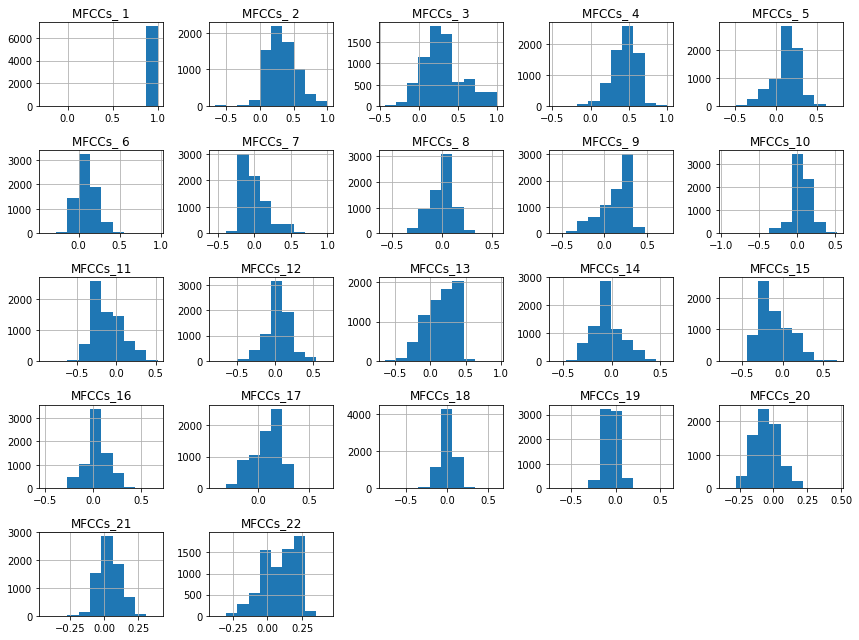

In [27]:
# Глянем распределения, чтобы убедиться, что есть смысл в нормализации
df.drop(["Family", "Genus", "Species", "RecordID"], axis=1).hist();
plt.tight_layout();

Соберем классификатор для $l_2$-регуляризации

In [28]:
# Будем использовать LogisticRegressionCV для поиска оптимального значения C
from sklearn.linear_model import LogisticRegressionCV

# Создаем объект для разбиения по фолдам, не забываем данные перемешать, т.к. они существенно упорядочены
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=13)

Cs = np.logspace(-5, 5, 11)

pipel2 = make_pipeline(StandardScaler(), 
                       LogisticRegressionCV(
                           cv=cv,
                           Cs=Cs, 
                           penalty="l2", 
                           solver="liblinear",
                           scoring="roc_auc"))

Соберем классификатор для $l_1$-регуляризации

In [29]:
# Создаем объект для разбиения по фолда, не забываем данные перемешать, т.к. они существенно упорядочены
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=13)

Cs = np.logspace(-5, 5, 11)

# Немного увеличим max_iter, чтобы алгоритм успевал сходиться
pipel1 = make_pipeline(StandardScaler(), 
                       LogisticRegressionCV(
                           cv=cv,
                           Cs=Cs, 
                           penalty="l1", 
                           solver="saga",
                           max_iter=10000,
                           scoring="roc_auc"))

 А теперь просто перебираем все семейства

In [30]:
params = {}

for family in families:
    params[family] = {}
    
    print(family)
    target = (df["Family"] == family).values
    
    print("\tL2")
    res = pipel2.fit(data, target)
    
    # Теперь посмотрим значение параметра
    C = res.named_steps["logisticregressioncv"].C_
    Cs = res.named_steps["logisticregressioncv"].Cs_ 
    
    # И заодно достанем значение метрик для фолдов
    scores = res.named_steps["logisticregressioncv"].scores_[1]
    
    idx = np.where(Cs == C) # Просто находим номер значения для этого параметра
    print("\t\tC = ", C)
    print("\t\tROC AUC = ", scores[:,idx].ravel())
    
    params[family]["l2"] = C
    
    print("\tL1")
    res = pipel1.fit(data, target)
    
    # Теперь посмотрим значение параметра
    C = res.named_steps["logisticregressioncv"].C_
    Cs = res.named_steps["logisticregressioncv"].Cs_ 
    
    # И заодно достанем значение метрик для фолдов
    scores = res.named_steps["logisticregressioncv"].scores_[1]
    
    idx = np.where(Cs == C) # Просто находим номер значения для этого параметра
    print("\t\tC = ", C)
    print("\t\tROC AUC = ", scores[:,idx].ravel())
    
    params[family]["l1"] = C
    
    print()
    
print("DONE")

Leptodactylidae
	L2
		C =  [10000.]
		ROC AUC =  [0.97843192 0.98289499 0.98393204]
	L1
		C =  [100000.]
		ROC AUC =  [0.97842825 0.98285609 0.98392396]

Dendrobatidae
	L2
		C =  [100000.]
		ROC AUC =  [0.99435308 0.99082006 0.99652858]
	L1
		C =  [10.]
		ROC AUC =  [0.99400435 0.99082006 0.99652609]

Hylidae
	L2
		C =  [100.]
		ROC AUC =  [0.96775091 0.97448799 0.9566439 ]
	L1
		C =  [10000.]
		ROC AUC =  [0.96776413 0.97448386 0.95660837]

Bufonidae
	L2
		C =  [0.1]
		ROC AUC =  [0.98620261 0.9684726  0.96997712]
	L1
		C =  [10000.]
		ROC AUC =  [0.99019177 0.96139425 0.95470938]

DONE


А теперь красивые картинки (рисуем ROC-кривые)

Best params:  {'l2': array([10000.]), 'l1': array([100000.])}


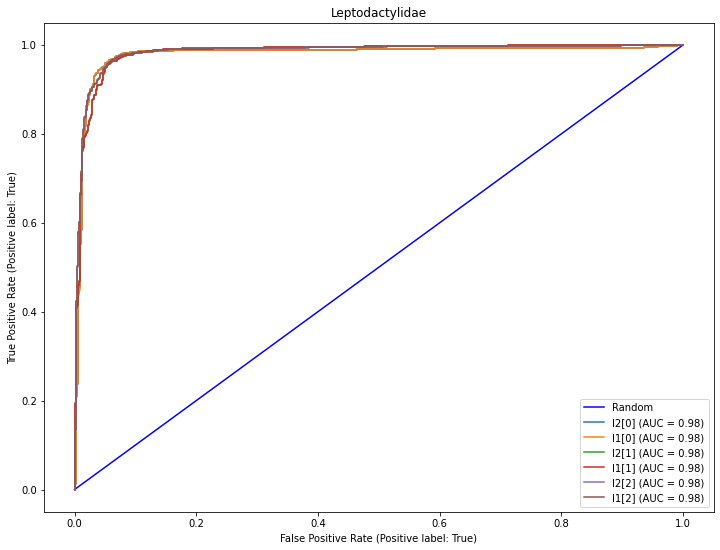

Best params:  {'l2': array([100000.]), 'l1': array([10.])}


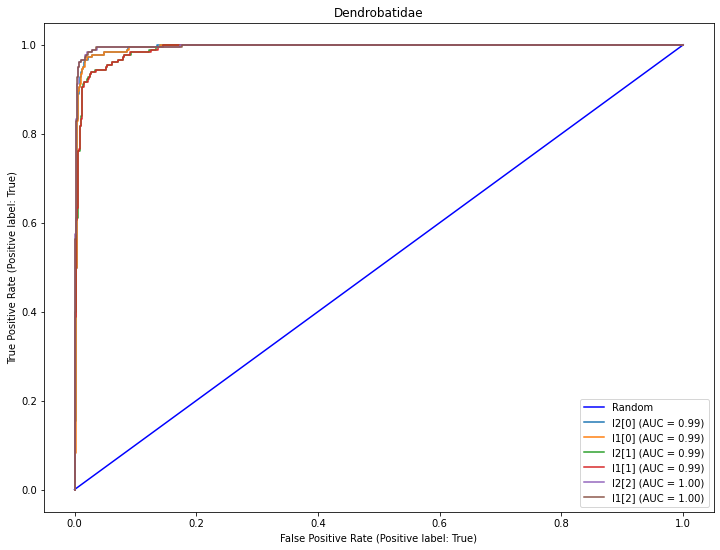

Best params:  {'l2': array([100.]), 'l1': array([10000.])}


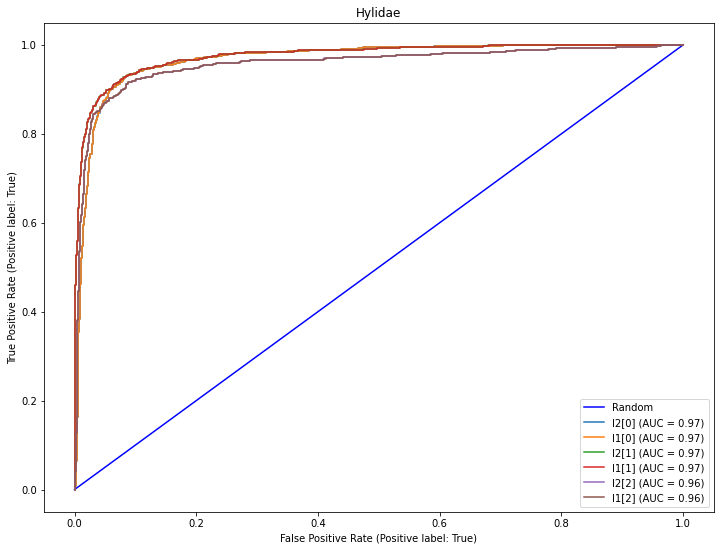

Best params:  {'l2': array([0.1]), 'l1': array([10000.])}


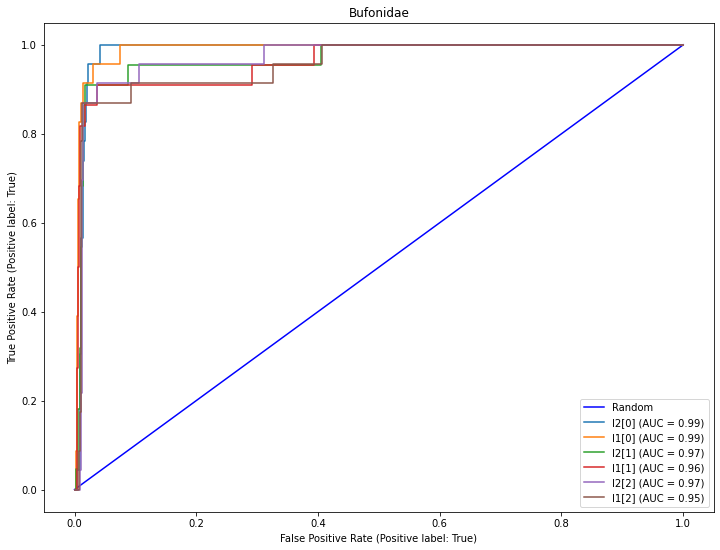

In [45]:
from sklearn.metrics import plot_roc_curve, roc_curve
from sklearn.linear_model import LogisticRegression



for family in families:
    fig, ax = plt.subplots(figsize=(12, 9))
    ax.plot([0,1], [0,1], "b-", label="Random")
 
    target = (df["Family"] == family).values
    print("Best params: ", params[family])
    l2 = make_pipeline(StandardScaler(), 
                       LogisticRegression(C=params[family]["l2"][0], penalty="l2", solver="liblinear"))
                       
    l1 = make_pipeline(StandardScaler(), 
                       LogisticRegression(C=params[family]["l1"][0], penalty="l1", solver="saga", max_iter=10000))
                       
    # вручную набираем фолды
    for i, (train, test) in enumerate(cv.split(data, target)):
        l2.fit(data[train], target[train])
        l1.fit(data[train], target[train])
        
        plot_roc_curve(l2, data[test], target[test], name="l2[%d]" % i, ax=ax)
        plot_roc_curve(l1, data[test], target[test], name="l1[%d]" % i, ax=ax)
        
        # или можно было руками все сделать
        #fpr, tpr, _ = roc_curve(target[test], l2.predict_proba(data[test])[:, 1])
        #ax.plot(fpr, tpr, label="l2[%d]" % i)
    
    
    ax.set(title=family)
    ax.legend()
    plt.show()
    

В качестве упражнения рассмотрим распределения оценок принадлежности к классу в зависимости от истинного класса.

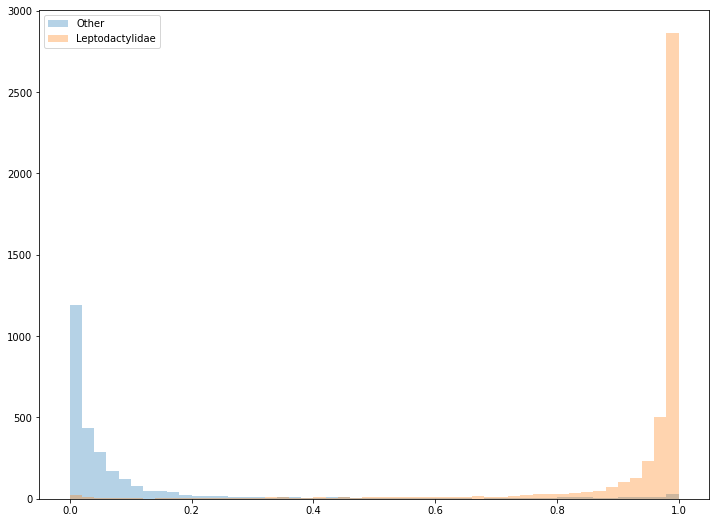

In [48]:
family = families[0]

target = (df["Family"] == family).values

l2 = make_pipeline(StandardScaler(), 
                   LogisticRegression(C=params[family]["l2"][0], penalty="l2", solver="liblinear"))

l2_0 = np.asarray([])
l2_1 = np.asarray([])

for i, (train, test) in enumerate(cv.split(data, target)):
    l2.fit(data[train], target[train])
    
    prob_l2 = l2.predict_proba(data[test])
    
    # Мы берем значения в предположении гипотезы, что у нас наблюдается выбранное семейство
    l2_0 = np.concatenate([l2_0, prob_l2[target[test] == 0][:,1]])
    l2_1 = np.concatenate([l2_1, prob_l2[target[test] == 1][:,1]])

plt.figure(figsize=(12, 9))
plt.hist(l2_0, bins=50, label="Other", alpha=0.33)
plt.hist(l2_1, bins=50, label=family, alpha=0.33)
plt.legend()
plt.show()

**3. Добавить полиномиальные признаки до второго порядка. Построить бинарный классификатор для каждого семейства на основе LogisticRegression c $l_1$ и $l_2$ регуляризацими. Подобрать гиперпараметр $C$ с помощью кросс-валидации, используя метрику ROC AUC.**

In [49]:
# Мы слишком ленивые, чтобы делать это сами
from sklearn.preprocessing import PolynomialFeatures

Также соберем наши классификаторы

In [50]:
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=13)

Cs = np.logspace(-5, 5, 11)
pipel2p = make_pipeline(PolynomialFeatures(2),
                        StandardScaler(), 
                        LogisticRegressionCV(
                            cv=cv,
                            Cs=Cs, 
                            penalty="l2", 
                            solver="liblinear",
                            max_iter=10000,
                            scoring="roc_auc"))



cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=13)

Cs = np.logspace(-5, 5, 11)
pipel1p = make_pipeline(PolynomialFeatures(2),
                        StandardScaler(), 
                        LogisticRegressionCV(
                            cv=cv,
                            Cs=Cs, 
                            penalty="l1", 
                            solver="saga",
                            max_iter=10000,
                            scoring="roc_auc"))

А теперь просто выведем все результаты

In [51]:
for family in families:
    print(family)
    target = (df["Family"] == family).values
    
    print("\tL2")
    res = pipel2p.fit(data, target)
    # Теперь посмотрим значение параметра
    C = res.named_steps["logisticregressioncv"].C_
    Cs = res.named_steps["logisticregressioncv"].Cs_ 
    # И заодно достанем значение метрик для фолдов
    scores = res.named_steps["logisticregressioncv"].scores_[1]
    idx = np.where(Cs == C) # Просто находим номер значения для этого параметра
    print("\t\tC = ", C)
    print("\t\tROC AUC = ", scores[:,idx].ravel())
    
    print("\tL1")
    res = pipel1p.fit(data, target)
    # Теперь посмотрим значение параметра
    C = res.named_steps["logisticregressioncv"].C_
    Cs = res.named_steps["logisticregressioncv"].Cs_ 
    # И заодно достанем значение метрик для фолдов
    scores = res.named_steps["logisticregressioncv"].scores_[1]
    idx = np.where(Cs == C) # Просто находим номер значения для этого параметра
    print("\t\tC = ", C)
    print("\t\tROC AUC = ", scores[:,idx].ravel())
    
    print()
    
print("DONE")

Leptodactylidae
	L2
		C =  [1.]
		ROC AUC =  [0.99093034 0.99675885]
	L1
		C =  [100000.]
		ROC AUC =  [0.9912032  0.99612791]

Dendrobatidae
	L2
		C =  [10.]
		ROC AUC =  [0.99969388 0.99971265]
	L1
		C =  [100.]
		ROC AUC =  [0.99985471 0.99957286]

Hylidae
	L2
		C =  [0.1]
		ROC AUC =  [0.99424432 0.9933181 ]
	L1
		C =  [1.]
		ROC AUC =  [0.99500173 0.99348089]

Bufonidae
	L2
		C =  [0.01]
		ROC AUC =  [0.95744207 0.99013554]
	L1
		C =  [0.1]
		ROC AUC =  [0.97267611 0.97655644]

DONE
